In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametric bootstrap

To illustrate, we take 30 bootsrap samples from a population of size 100.

population

In [3]:
# construct a population of size 100
np.random.seed(42)
population = np.random.randint(0,100 , size=100)
population

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74, 87, 99, 23,  2, 21, 52,  1,
       87, 29, 37,  1, 63, 59, 20, 32, 75, 57, 21, 88, 48, 90, 58, 41, 91,
       59, 79, 14, 61, 61, 46, 61, 50, 54, 63,  2, 50,  6, 20, 72, 38, 17,
        3, 88, 59, 13,  8, 89, 52,  1, 83, 91, 59, 70, 43,  7, 46, 34, 77,
       80, 35, 49,  3,  1,  5, 53,  3, 53, 92, 62, 17, 89, 43, 33, 73, 61,
       99, 13, 94, 47, 14, 71, 77, 86, 61, 39, 84, 79, 81, 52, 23])

In [4]:
# population mean
population.mean()

50.54

In [5]:
# population standard deviation
population.std()

29.278463074417004

orignial sample

In [6]:
# draw a sample of size 30 from population
sample = np.random.choice(population, size=30)
sample

array([75, 47, 83, 61, 88, 21,  2,  7, 47, 49, 74, 94, 51, 86, 94, 70, 87,
       89, 86, 59, 59, 41, 60, 61, 21, 82,  1,  3, 99, 91])

In [7]:
# our first sample mean
sample_mean = sample.mean()
sample_mean

59.6

In [8]:
# standard deiveation for this sample
sample_std = np.std(sample, ddof=1)
sample_std

30.444522750689348

In [9]:
# estimated standard error for the sapmle mann
sample_std/(30 ** 0.5)

5.558383954343928

In [10]:
# theorical standard error for sapmle mann
population.std()/(30 ** 0.5)

5.345491558313417

bootstrap sampling

In [11]:
# bootstrap resampling from empirical CDF. Since each step of our empirical CDF is identical (1/n), 
# sampling from the empirical CDF is the same as re-sampling (with replacement and equal probabilities) 
# from the sample.
boot_means = []
for _ in range(10000):
    bootsample = np.random.choice(sample,size=30, replace=True)
    boot_means.append(bootsample.mean())

In [12]:
# simulated mean of mean
bootmean = np.mean(boot_means)

In [13]:
# simulated standard deviation of mean
bootmean_std = np.std(boot_means)

In [14]:
# simulated mean VS true mean
(population.mean(), bootmean)

(50.54, 59.66076333333333)

In [15]:
# the theorical standard error and simulated standard error
(population.std()/(30 ** 0.5), bootmean_std)

(5.345491558313417, 5.49753810916911)

(array([  16.,   63.,  323., 1235., 2363., 2943., 2111.,  779.,  147.,
          20.]),
 array([37.53333333, 41.70333333, 45.87333333, 50.04333333, 54.21333333,
        58.38333333, 62.55333333, 66.72333333, 70.89333333, 75.06333333,
        79.23333333]),
 <a list of 10 Patch objects>)

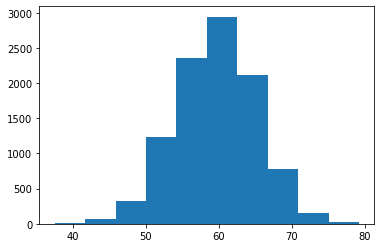

In [16]:
plt.hist(boot_means)

# Parametric bootstrap

Suppose the data $x_1, . . . , x_{300}$ is drawn from an $\exp (\lambda)$ distribution. Assume
also that the data mean $x = 2$. Estimate $\lambda$ and give a 95% parametric bootstrap confidence
interval for $\lambda$.

In [17]:
# Given 300 data points with mean 2.
# Assume the data is exp(lambda)
# PROBLEM: Compute a 95% parametric bootstrap confidence interval for lambda

# the number of data points and mean
n = 300
xbar = 2
# the number of bootstrap samples
nboot = 1000

In [18]:
# We draw the bootstrap sample from Exponential(lambdahat)
# Each column is one bootstrap sample (of 300 resampled values)
bootstrapsample = np.random.exponential(scale=xbar, size=(n, nboot))

In [19]:
sample_means=np.mean(bootstrapsample, axis=0)

In [20]:
# simulated mean of mean
bootmean = np.mean(sample_means)
bootmean

1.9992854213203346

In [21]:
# simulated standard deviation of mean
bootmean_std = np.std(sample_means)
bootmean_std

0.11256670761306142

(array([  16.,   63.,  323., 1235., 2363., 2943., 2111.,  779.,  147.,
          20.]),
 array([37.53333333, 41.70333333, 45.87333333, 50.04333333, 54.21333333,
        58.38333333, 62.55333333, 66.72333333, 70.89333333, 75.06333333,
        79.23333333]),
 <a list of 10 Patch objects>)

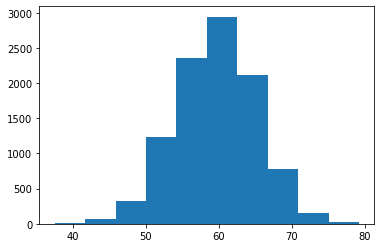

In [22]:
plt.hist(boot_means)

confidence interval

In [25]:
lambdahat = 1.0/xbar

# Compute the bootstrap lambdastar
lambdastar = 1.0/sample_means

# Compute the differences
deltastar = lambdastar - lambdahat
 
# Construct confidence interval
upper = lambdahat-np.quantile(deltastar, 0.05)
lower = lambdahat-np.quantile(deltastar, 0.95)

ci = (lower, upper)
ci

(0.45078080625259803, 0.5439570029409425)